# Chinemerem Iweala
# INST414
# Final Project

## Data
The data used in this project is titled "200+ Financial Indicators of US stocks (2018)" and can be found here on Kaggle: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv. The data contains indicators of stocks available in the US for the purpose of trying to see if machine learning models can find differences between well performing and poor performing stocks. 

## Analysis
After conducting all these tests, the one that made the most sense to me to use for this data was logical regression. I believe for the dataset that I chose, which was 200+ charcteritics of 2018 stocks, logical regression makes the most sense to use. I had to do a lot of edits to the data before I was able to run it throught the XGBoost, PyTorch, and Keras algorithms. However, for Logical Regression, I simply had to take out the two categorical variables to get a reasonable answer (the name of the stock and the sector it was in (Health, Electronics, Cars, etc.)). The Decision Tree does not tell me much since I only have 2 outcomes that could occur (stock either goes up or down), so I do not find this as useful as Logical Regression For XGBoost, I had to change the feature names to take out certain symbols, such as "[ ]". For Keras, it was difficult to determine what loss operation I needed to use. I first tried mean_square_error, but that resulted in NaN. For PyTorch, most of the problem was in setting it up. As you can see in that section, I had to install 4 different modules just to begin. Some commands did not work as they should have, so I had to find workaround for them.

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
raw_data = pd.read_csv("2018_Financial_Data.csv")
raw_data.head()
raw_data['Revenue']

0       94507000000.00000
1       14144000000.00000
2       70848000000.00000
3       30391000000.00000
4      121615000000.00000
              ...        
4387              0.00000
4388         556000.00000
4389       54884381.00000
4390              0.00000
4391       53019000.00000
Name: Revenue, Length: 4392, dtype: float64

In [4]:
#dropping categorical features, filling NA, and rounding values
stock_data2 = raw_data.drop(['Code','Sector'], axis=1)
stock_data1 = stock_data2.fillna(0)
stock_data = stock_data1.round(5)

import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
stock_data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in stock_data.columns.values]

stock_data.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR _%_,Class
0,94507000000.00000,0.11150,0.00000,94507000000.00000,0.00000,64822000000.00000,75498000000.00000,19009000000.00000,3542000000.00000,15111000000.00000,...,0.23480,0.25700,0.00000,0.34260,0.07220,0.73090,0.00000,0.13080,32.79457,1
1,14144000000.00000,0.03200,7288000000.00000,6856000000.00000,0.00000,601000000.00000,3062000000.00000,3794000000.00000,1917000000.00000,2196000000.00000,...,-0.27850,0.03450,-0.09200,-0.00240,0.00760,-0.01370,0.00000,-0.12650,40.58807,1
2,70848000000.00000,0.12890,27111000000.00000,43737000000.00000,13543000000.00000,6750000000.00000,20421000000.00000,23316000000.00000,-126000000.00000,23317000000.00000,...,0.07720,0.19890,0.03870,0.03820,0.10140,-0.01690,0.03900,-0.09420,30.29551,1
3,30391000000.00000,0.49550,12500000000.00000,17891000000.00000,2141000000.00000,813000000.00000,2897000000.00000,14994000000.00000,342000000.00000,14303000000.00000,...,0.00000,0.45730,0.15110,0.22750,0.63950,-0.58410,0.17380,0.09420,64.21374,1
4,121615000000.00000,0.02850,95461000000.00000,26154000000.00000,0.00000,18111000000.00000,40711000000.00000,-14557000000.00000,5059000000.00000,-21772000000.00000,...,-0.26190,-0.27810,-0.28920,-0.15750,-0.44870,-0.22970,0.00000,0.03080,44.75784,1


There are at least one NA value in every column, so a .dropna would result in no data. Therefore, I am filling the Na with 1 in order to be able to run tests. 

## Logistic Regression

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
stock_X = stock_data.iloc[:,:-1]
stock_y = stock_data.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(stock_X, stock_y, test_size=0.25, random_state=0)

In [8]:
LogReg = LogisticRegression()


scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)


y_pred=LogReg.predict(X_test)

C:\Users\joshu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
print('Classes', LogReg.classes_)
print('Intercept',LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes [0 1]
Intercept [4.18208098]
Coefficients [[ 2.24366995e-01  5.47896056e-02  7.19748533e-02  2.86010952e-01
   1.67001455e-01 -1.92312930e-01 -1.78419695e-01  6.65275601e-02
   7.93994795e-02 -2.48443896e-01  1.57061841e-02 -1.79756908e-01
  -2.10450060e-01  1.23853479e-02  3.75882950e-02 -2.47969233e-01
   5.37970079e-02  5.71550609e-02 -1.26052115e-01  1.77536455e-01
   3.91192625e-02  1.17746097e-01 -2.33135418e-02 -1.04221144e-01
  -9.29391142e-03  2.82871099e-01  2.60320578e-02  1.74257490e-03
   2.02848103e-02 -8.33486522e-02  4.44151649e-02  1.79499553e-01
  -3.42695570e-01  2.56595946e-01 -7.42157918e-03  1.18600986e-01
  -6.08331403e-01 -2.16462311e-01 -4.87843705e-01 -5.45423231e-02
  -5.70828526e-02  4.15247519e-02  7.46669617e-02  1.72554798e-01
  -2.48234652e-01  1.56644934e-02  1.25016825e-02  4.23297535e-02
   4.84625711e-01  1.13916262e-01  4.50513056e-01  1.78965882e-01
   1.81516775e-01  1.83997765e-01  7.73444422e-02  1.88613353e-01
   8.29149218e-02  1.67731

In [9]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9608378870673953
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       350
           1       0.95      0.99      0.97       748

    accuracy                           0.96      1098
   macro avg       0.97      0.94      0.95      1098
weighted avg       0.96      0.96      0.96      1098



In [10]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[315,  35],
       [  8, 740]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

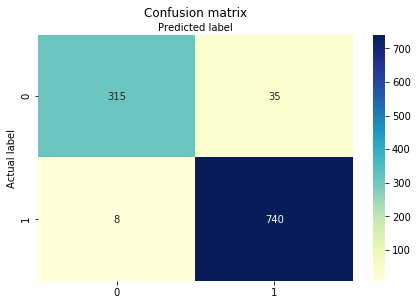

In [11]:
categories = [0,1] 
fig, ax = plt.subplots()
plt.xticks([0,1], categories)
plt.yticks([0,1], categories)
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### F1 Score

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9608378870673953
Precision: 0.9548387096774194
Recall: 0.9893048128342246


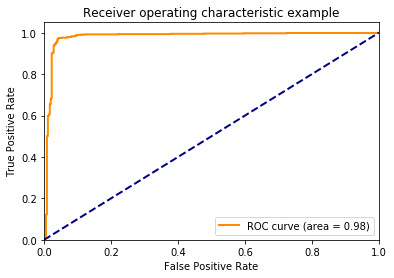

In [13]:
y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
        lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Decision Tree Classification

In [14]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree

In [14]:
stock_data[:0]
features = []
for value in stock_data[:0]:
    features.append(value)
stock_data.shape

(4392, 223)

In [16]:
A = stock_data.drop(['Class'], axis = 1)
b = stock_data['Class'] #Class = 1 means people should BUY, Class = 0 means people should NOT BUY 

In [17]:
A.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR _%_
0,94507000000.00000,0.11150,0.00000,94507000000.00000,0.00000,64822000000.00000,75498000000.00000,19009000000.00000,3542000000.00000,15111000000.00000,...,0.18650,0.23480,0.25700,0.00000,0.34260,0.07220,0.73090,0.00000,0.13080,32.79457
1,14144000000.00000,0.03200,7288000000.00000,6856000000.00000,0.00000,601000000.00000,3062000000.00000,3794000000.00000,1917000000.00000,2196000000.00000,...,-0.14210,-0.27850,0.03450,-0.09200,-0.00240,0.00760,-0.01370,0.00000,-0.12650,40.58807
2,70848000000.00000,0.12890,27111000000.00000,43737000000.00000,13543000000.00000,6750000000.00000,20421000000.00000,23316000000.00000,-126000000.00000,23317000000.00000,...,0.05920,0.07720,0.19890,0.03870,0.03820,0.10140,-0.01690,0.03900,-0.09420,30.29551
3,30391000000.00000,0.49550,12500000000.00000,17891000000.00000,2141000000.00000,813000000.00000,2897000000.00000,14994000000.00000,342000000.00000,14303000000.00000,...,0.00000,0.00000,0.45730,0.15110,0.22750,0.63950,-0.58410,0.17380,0.09420,64.21374
4,121615000000.00000,0.02850,95461000000.00000,26154000000.00000,0.00000,18111000000.00000,40711000000.00000,-14557000000.00000,5059000000.00000,-21772000000.00000,...,-0.14080,-0.26190,-0.27810,-0.28920,-0.15750,-0.44870,-0.22970,0.00000,0.03080,44.75784


In [18]:
b.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [19]:
#a in place of X, b in place of y
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=99)
clf = DecisionTreeClassifier(criterion="entropy")

In [20]:
clf.fit(A_train, b_train)
b_pred = clf.predict(A_test)
accuracy_score(b_test, b_pred)

1.0

In [21]:
accuracy = float(np.sum(b_pred==b_test))/b_test.shape[0]
accuracy

1.0

[Text(334.8, 489.24, 'X[221] <= -0.005\nentropy = 0.889\nsamples = 3513\nvalue = [1076, 2437]'),
 Text(167.4, 163.08000000000004, 'entropy = 0.0\nsamples = 1076\nvalue = [1076, 0]'),
 Text(502.20000000000005, 163.08000000000004, 'entropy = 0.0\nsamples = 2437\nvalue = [0, 2437]')]

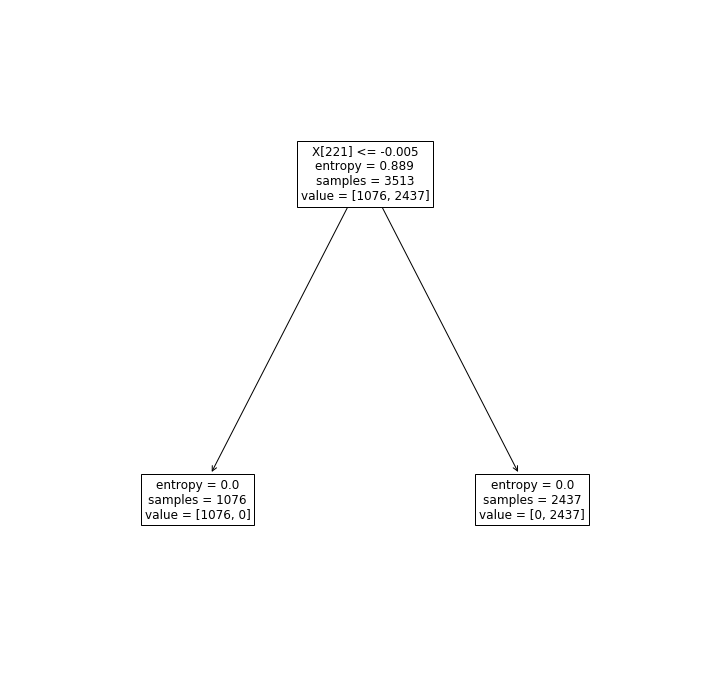

In [22]:
fig, ax = plt.subplots(figsize=(12,12))
tree.plot_tree(decision_tree=clf, max_depth=3, fontsize=12)

## XGBoost with display of feature importance

In [148]:
# !{sys.executable} -m pip install xgboost

In [42]:
import xgboost as xg
from xgboost import XGBRegressor
stock_X = stock_data.iloc[:,0:-1]
stock_y = stock_data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(stock_X, stock_y, test_size=0.25, random_state=12)

In [45]:
xg_cl = xg.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xg_cl.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [46]:
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f"% (accuracy))

accuracy: 1.000000


In [62]:
xg_cl.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1.], dtype=float32

In [68]:
features

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [79]:
#plt.barh(features, xg_cl.feature_importances_)

![graph](featimp.jpg)

## Neural Network (Keras)

In [152]:
import sys
# !{sys.executable} -m pip install keras

In [153]:
# !{sys.executable} -m pip install --upgrade pip

In [154]:
# !{sys.executable} -m pip install wrapt --upgrade --ignore-installed

In [155]:
# !{sys.executable} -m pip install tensorflow

In [156]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [157]:
model = Sequential()
model.add(Dense(10, input_shape=(222,), activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                2230      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(optimizer="adam", loss="mean_squared_logarithmic_error")
model.fit(X_train, y_train, batch_size=20, epochs=10)

Epoch 1/10
176/176 [==============================] - ETA: 0s - loss: 165.253 - ETA: 0s - loss: 39.989 - ETA: 0s - loss: 21.40 - ETA: 0s - loss: 14.11 - 0s 1ms/step - loss: 11.0878
Epoch 2/10
176/176 [==============================] - ETA: 0s - loss: 0.312 - ETA: 0s - loss: 0.342 - ETA: 0s - loss: 0.339 - ETA: 0s - loss: 1.249 - ETA: 0s - loss: 1.586 - 0s 1ms/step - loss: 1.4764
Epoch 3/10
176/176 [==============================] - ETA: 0s - loss: 0.360 - ETA: 0s - loss: 0.658 - ETA: 0s - loss: 0.463 - ETA: 0s - loss: 0.403 - 0s 929us/step - loss: 0.4010
Epoch 4/10
176/176 [==============================] - ETA: 0s - loss: 0.288 - ETA: 0s - loss: 0.337 - ETA: 0s - loss: 0.336 - ETA: 0s - loss: 0.334 - 0s 962us/step - loss: 0.3347
Epoch 5/10
176/176 [==============================] - ETA: 0s - loss: 0.384 - ETA: 0s - loss: 0.326 - ETA: 0s - loss: 0.331 - ETA: 0s - loss: 0.334 - 0s 951us/step - loss: 0.3347
Epoch 6/10
176/176 [==============================] - ETA: 0s - loss: 0.336 - ETA

In [159]:
preds=model.predict(X_test)
print(preds)

[[-5.77665280e+09]
 [-2.48597820e+07]
 [-8.14847600e+07]
 [-2.33397380e+07]
 [-7.29048384e+08]
 [-1.67371744e+08]
 [-2.74962688e+08]
 [-3.59630784e+08]
 [-6.60038963e+09]
 [-1.18456781e+09]
 [-3.49959648e+08]
 [-5.20327936e+09]
 [-2.01353712e+08]
 [-1.23466486e+10]
 [-1.90215539e+09]
 [-1.78705280e+08]
 [-4.28754336e+08]
 [-6.07739400e+07]
 [-1.70081485e+11]
 [-1.96258840e+07]
 [-2.71576925e+06]
 [-2.86622496e+08]
 [-4.72263680e+09]
 [-6.55811648e+08]
 [-1.39073523e+09]
 [-1.55617907e+09]
 [-4.95052595e+09]
 [-1.68587920e+08]
 [-9.55364557e+09]
 [-2.74789888e+09]
 [-5.71985203e+09]
 [-1.67764500e+07]
 [-3.98533171e+09]
 [-8.06551654e+09]
 [-5.38818752e+08]
 [-7.58367744e+09]
 [-1.90862720e+07]
 [-6.63758438e+09]
 [-1.39709274e+09]
 [-4.94918554e+09]
 [-5.65749000e+06]
 [-1.33606003e+09]
 [-4.29616360e+07]
 [-3.93091008e+08]
 [-1.03287610e+09]
 [-1.41485040e+08]
 [-4.43046912e+09]
 [-2.96108128e+08]
 [-7.98333824e+08]
 [-3.37378637e+09]
 [-4.54263200e+07]
 [-2.64539968e+08]
 [-2.4920852

In [160]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 963us/step - loss: 0.9960


0.9959694743156433

## Neural Network (PyTorch)

In [161]:
#!{sys.executable} -m pip install pytorch_wheel_installer

In [162]:
#!{sys.executable} -m pip install torch-1.2.0-cp37-cp37m-win_amd64.whl

In [163]:
#!{sys.executable} -m pip install torch

In [164]:
#!{sys.executable} -m pip install torchvision

x = pd.DataFrame(stock_data.std(0))
x.columns = ['StdDev']
deviations = []
for value in x['StdDev']:
    deviations.append(value)
deviations

import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((deviations), (deviations))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

print(testloader.dataset, trainloader.dataset)
print(testloader.batch_size)
print(trainloader.sampler)

## Neural Network (PyTorch)

In [1]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F

In [15]:
stock_data.shape
features

['Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total curre

In [23]:
cols = ['Revenue Growth','Gross Profit','Net Income','Net Income Growth','Class']
torch_df = stock_data[cols]
#Again for Class, 1 = should buy, 0 = should not buy
torch_df = torch_df.dropna(how='any')

1   0.69353
0   0.30647
Name: Class, dtype: float64

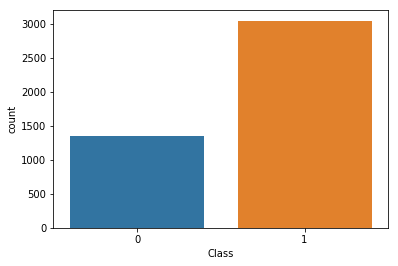

In [25]:
sns.countplot(torch_df.Class)
torch_df.Class.value_counts()/torch_df.shape[0]
#About 69% of the stocks are labeled as ones to buy, while about 31% are labeled as not to buy

In [27]:
#C for X, d for y
C = torch_df[['Revenue Growth','Gross Profit','Net Income','Net Income Growth']]
d = torch_df[['Class']]
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size=0.2, random_state=123)

In [34]:
C_train = torch.from_numpy(C_train.to_numpy()).float()
d_train = torch.squeeze(torch.from_numpy(d_train.to_numpy()).float())
C_test = torch.from_numpy(C_test.to_numpy()).float()
d_test = torch.squeeze(torch.from_numpy(d_test.to_numpy()).float())
print(C_train.shape, d_train.shape)
print(C_test.shape, d_test.shape)

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [33]:
import sys
!{sys.executable} -m pip install dataframe --upgrade

You should consider upgrading via the 'C:\Users\joshu\Anaconda3\python.exe -m pip install --upgrade pip' command.
